# Tutorial 6: Building a transfer line

# Python libraries 

In [12]:
#########################################
# Python libraries                      #
#########################################
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

#########################################
# Cpymad library                        #
#########################################
from cpymad.madx import Madx 

# Launching MAD-X

In [13]:
# madx = Madx(stdout=True)
madx = Madx()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2023.05.05               +
  + Execution date: 2024.01.18 20:39:13      +
  ++++++++++++++++++++++++++++++++++++++++++++


# Questions

#### 1. Build a transfer line for a 2 GeV proton beam of 10 m total length, $L_{tot}$, with 4 quadrupoles of 0.1 m long, $L_q$, and a strength, k, of 0.1 $m^{-2}$. Place the quadrupoles centered at 2, 4, 6, and 8 m. What is the error message that you get if you try to find a periodic solution? Why?

#### First, we load the lattice:

In [14]:
madx.call("Tutorial6_solution.madx")

! *********************************************************************

! Definition of parameters

! *********************************************************************



quadrupoleLength=0.1;

l_cell=10;



myK1=.1;// m^-2

myK2=.1;// m^-2

myK3=.1;// m^-2

myK4=.1;// m^-2



! *********************************************************************

! Definition of magnets

! ********************************************************************* 



Q: quadrupole, L=quadrupoleLength;



! *********************************************************************

! Definition of sequence

! *********************************************************************



myCell:sequence, refer=centre, L=l_cell;

myStart: marker, at=0;

q1: Q,K1:=myK1, at=2;

q2: Q,K1:=myK2, at=4;

q3: Q,K1:=myK3, at=6;

q4: Q,K1:=myK4, at=8;

myEnd: marker, at=10;

endsequence;



#### Then, we define the beam, activate the sequence and try to find a periodic solution

In [15]:
myString='''

! *********************************************************************
! Definition of beam
! *********************************************************************

beam, particle=proton, energy=2;

! *********************************************************************
! Activate the sequence
! *********************************************************************

use, sequence=myCell;

! *********************************************************************
! Twiss
! *********************************************************************

twiss;
'''
madx.input(myString);

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
++++++ warning: TWCLORB:  Vertical plane might be unstable More information with the debug flag on.                                                                                                                                                                                 
++++++ warning: TWCPIN:  Mode 2 is unstable for delta(p)/p =     0.000000: cosmux =     0.805975, cosmuy =     1.206091                                                        
++++++ warning: Twiss failed:  MAD-X continues


++++++ Error: seterrorflag : Errorcode: 1   Reported from pro_twiss:
++++++ Error: seterrorflag : Description: TWISS failed


#### **Conclusions**: the periodic solution does not exist for all focusing quadrupoles

#### 2. Compute the linear optics functions for the transfer line assuming ($\beta_{x}$ , $\alpha_{x}$ , $\beta_{y}$ , $\alpha_{y}$) = (1 m, 0, 2 m, 0) at the start of it. What are the values of the linear optics functions at the end of the transfer line ($\beta_{x, end1}$ , $\alpha_{x, end1}$ , $\beta_{y, end1}$ , $\alpha_{y, end1}$)?

#### In order to define the linear optics functions at the beginning of the beamline:

	twiss, sequence = name, betx = ??, alfx = ??, bety = ??, alfy = ??;

#### We TWISS now but adding the optic function values at the entrance of the lattice

In [16]:
myString='''

twiss,betx=1, bety=2;

'''
madx.input(myString);

enter Twiss module
  
open line - error with deltap:   0.000000E+00
initial orbit vector:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
final orbit vector:     0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
                10                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
       0.236117848                  0        85.59952509                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0       0.2150800354 

               dq2            betymax              dymax              dyrms 
                 0        61.41336649                  0                  0 

            ycomax             ycorms             deltap            synch_1 


#### We can save the TWISS data in a pandas dataframe

In [17]:
myDFTable1=madx.table['twiss'].dframe()
myDFTable1

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1
#s,mycell$start:1,marker,0.00,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mystart,mystart:1,marker,0.00,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,1.95,4.802500,-1.950000,0.174584,3.901250,-0.975000,0.122985,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q1,q1:1,quadrupole,2.05,5.197436,-1.998042,0.177770,4.105284,-1.066023,0.126963,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_1[0],drift_1:0,drift,3.95,16.257422,-3.823004,0.210905,10.034826,-2.054789,0.174794,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q2,q2:1,quadrupole,4.05,17.014863,-3.748881,0.211862,10.461302,-2.211390,0.176348,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_2[0],drift_2:0,drift,5.95,34.454604,-5.429930,0.224364,20.897199,-3.281187,0.196856,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q3,q3:1,quadrupole,6.05,35.514267,-5.163174,0.224819,21.580410,-3.553206,0.197606,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_3[0],drift_3:0,drift,7.95,57.945783,-6.642887,0.231487,37.361845,-4.752813,0.208263,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q4,q4:1,quadrupole,8.05,59.223333,-6.128361,0.231758,38.356732,-5.199368,0.208684,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### FRom the pandas dataframe we can select now the optics functions at the end of the beamline:

In [18]:
optics_at_end=myDFTable1.iloc[[-1]]
optics_at_end=optics_at_end[["name","keyword","betx","bety","alfx","alfy"]]
display(optics_at_end)

,name,keyword,betx,bety,alfx,alfy
#e,mycell$end:1,marker,85.599525,61.413366,-7.397891,-6.624547


#### And we can also plot the horizontal and vertical beta-functions

/Users/nuria/Desktop/JUAS2024/Tutorial6/../lib_JUAS2024.py:68: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax2.set_ylim(-np.max(abs(myDF.angle)),np.max(abs(myDF.angle)))


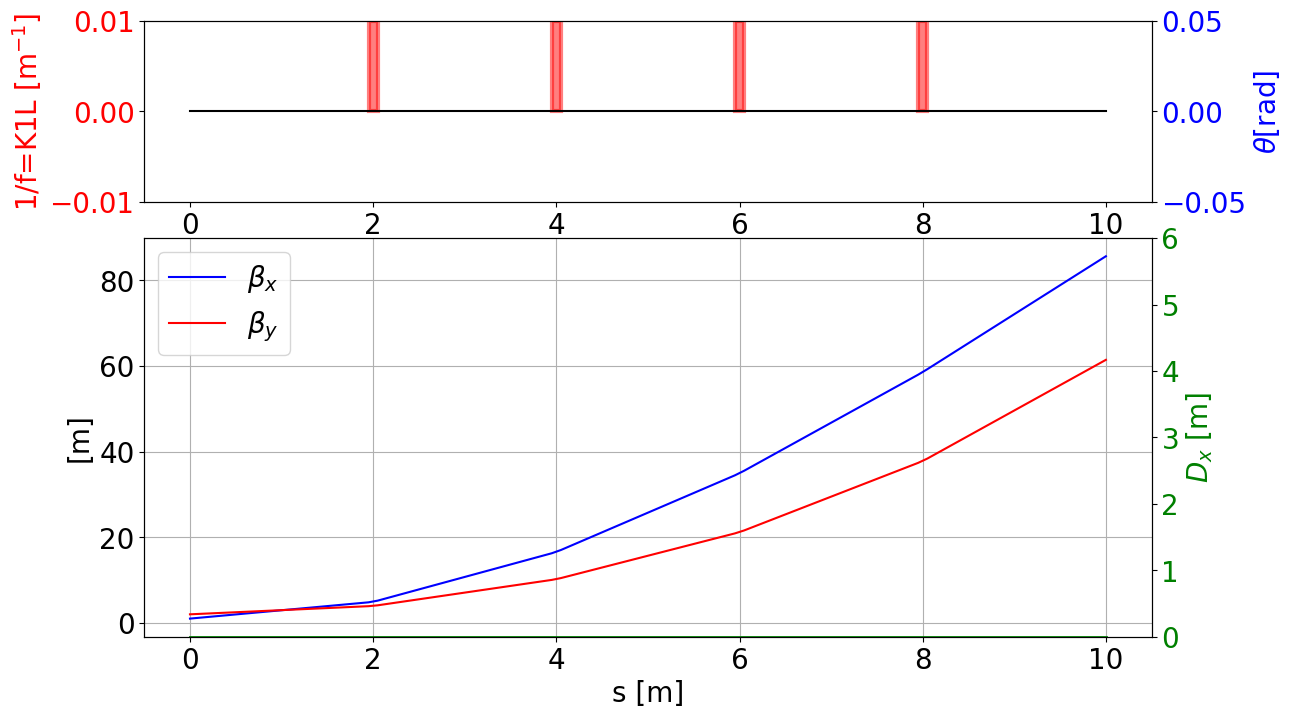

In [19]:
import sys
sys.path.append('../')
import lib_JUAS2024 as lib
lib.plot_layout(myDFTable1)

#### 3. Starting from ($\beta_{x}$ , $\alpha_{x}$ , $\beta_{y}$ , $\alpha_{y}$) = (1 m, 0, 2 m, 0) match the line to get at the end of the transfer line the following optics ($\beta_{x, end2}$ , $\alpha_{x, end2}$ , $\beta_{y, end2}$ , $\alpha_{y, end2}$) = (2 m, 0, 1 m, 0).

#### In order to perform a local matching, use the commands below:

		match, sequence = ??;
		constraint, range = #e, betx = ??;
		constraint, range = #e, alfx = ??;
		vary, name = ??, step = 0.00001;
		vary, name = ??, step = 0.00001;
		lmdif, call = 50, tolerance = 1e-6;
		endmatch;

#### Now, we are going to perform a local matching in order to get desired values of the $\beta$- and $\alpha$- functions at the end of the transfer line

In [20]:
myString='''

!The starting point strenghts are re-defined to be sure we are using the desired ones as starting point
myK1=.1;// m^-2
myK2=.1;// m^-2
myK3=.1;// m^-2
myK4=.1;// m^-2

MATCH, SEQUENCE=myCell, betx=1, bety=2;
constraint, betx=2, range=#e;
constraint, alfx=0, range=#e;
constraint, bety=1, range=#e;
constraint, alfy=0, range=#e;
VARY, NAME= myK1, STEP=0.00001;
VARY, NAME= myK2, STEP=0.00001;
VARY, NAME= myK3, STEP=0.00001;
VARY, NAME= myK4, STEP=0.00001;
JACOBIAN, CALLS=50, TOLERANCE=1e-10;
ENDMATCH;

twiss,betx=1, bety=2, file=AfterMatching1.txt;
'''
madx.input(myString);

++++++ info: myk1 redefined
++++++ info: myk2 redefined
++++++ info: myk3 redefined
++++++ info: myk4 redefined
START MATCHING

number of sequences: 1
sequence name: mycell
entry name: betx
number of entries: 1
entry value: 1.000000
entry name: bety
number of entries: 1
entry value: 2.000000
number of variables:    4
user given constraints: 1
total constraints:      4

START JACOBIAN:

 JACOBIAN Strategy =           3
Initial Penalty Function =   0.2049999680949818E+05


 Solve system with            4 con,           4 var
 Rank             4   Condition number    806.96395556704442     
 Step length    1.0002004021648470     
 Bisec iteration            3
call:     2 Dx =   0.80119192E+01  Penalty function =  0.4892946251361834E+06
 Solve system with            4 con,           4 var
 Rank             4   Condition number    108.17118857791539     
 Step length   0.19504885250022455     
call:     3 Dx =   0.19504885E+00  Penalty function =  0.4353984161876557E+05
 Solve system with  

#### Saving the TWISS data in a pandas dataframe

In [21]:
myDFTable2=madx.table["twiss"].dframe()
myDFTable2

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1
#s,mycell$start:1,marker,0.00,1.000000,0.000000e+00,0.000000,2.000000,0.000000e+00,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mystart,mystart:1,marker,0.00,1.000000,0.000000e+00,0.000000,2.000000,0.000000e+00,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,1.95,4.802500,-1.950000e+00,0.174584,3.901250,-9.750000e-01,0.122985,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q1,q1:1,quadrupole,2.05,5.236870,-2.403498e+00,0.177762,4.074009,-7.486906e-01,0.126974,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_1[0],drift_1:0,drift,3.95,19.041703,-4.862204e+00,0.208229,8.301834,-1.476480e+00,0.179943,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q2,q2:1,quadrupole,4.05,18.765573,7.563003e+00,0.209062,9.169425,-7.387896e+00,0.181787,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_2[0],drift_2:0,drift,5.95,1.222113,1.670397e+00,0.273993,59.125652,-1.890486e+01,0.194789,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q3,q3:1,quadrupole,6.05,0.989436,7.088991e-01,0.288652,58.865075,2.145127e+01,0.195055,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_3[0],drift_3:0,drift,7.95,3.777696,-2.176405e+00,0.568250,5.631482,6.566413e+00,0.211694,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q4,q4:1,quadrupole,8.05,3.901250,9.750001e-01,0.572339,4.802497,1.949998e+00,0.214797,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### We can save now the quadrupoles' data in a pandas dataframe called "first matching" for later comparison 

In [22]:
first_matching=myDFTable2[myDFTable2["keyword"]=="quadrupole"]
first_matching=first_matching[["name","keyword","s","betx","bety","k1l","l"]]
print(first_matching)

    name     keyword     s       betx       bety       k1l    l
q1  q1:1  quadrupole  2.05   5.236870   4.074009 -0.067697  0.1
q2  q2:1  quadrupole  4.05  18.765573   9.169425  0.654514  0.1
q3  q3:1  quadrupole  6.05   0.989436  58.865075 -0.680251  0.1
q4  q4:1  quadrupole  8.05   3.901250   4.802497  0.824398  0.1


#### And plot the optics functions for this case

/Users/nuria/Desktop/JUAS2024/Tutorial6/../lib_JUAS2024.py:68: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax2.set_ylim(-np.max(abs(myDF.angle)),np.max(abs(myDF.angle)))


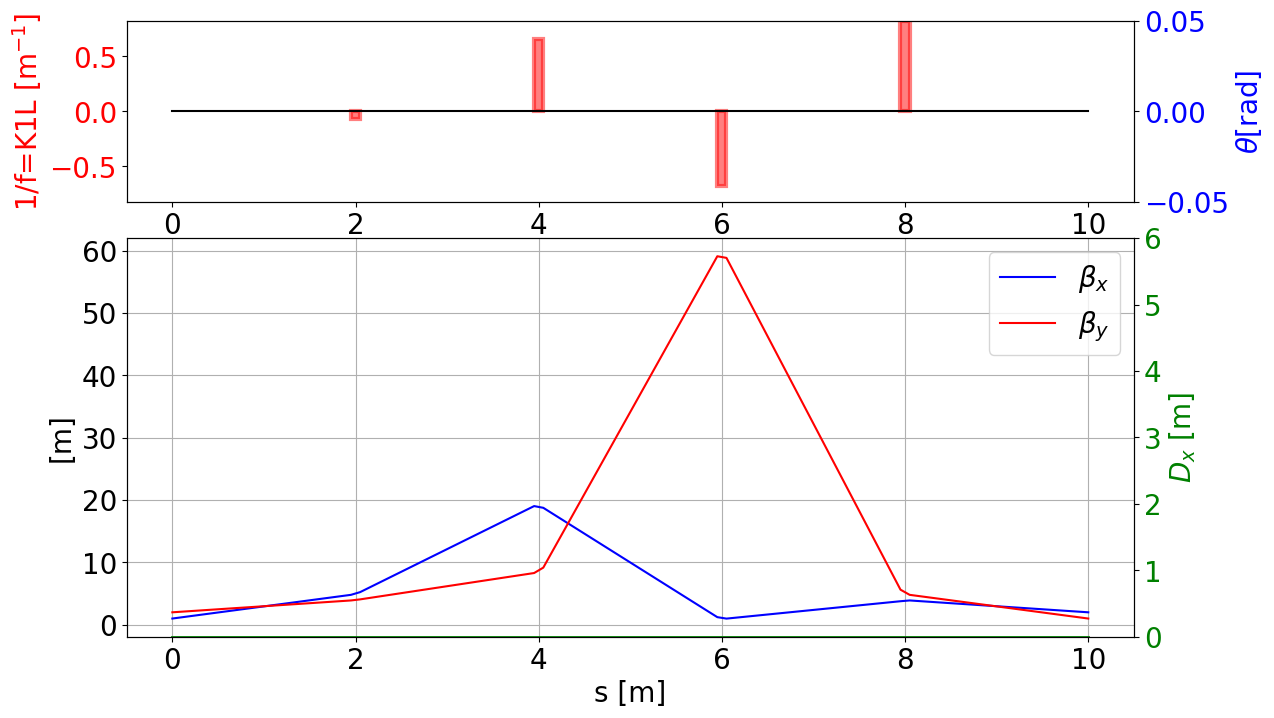

In [23]:
import sys
sys.path.append('../')
import lib_JUAS2024 as lib
lib.plot_layout(myDFTable2)

#### 4. Now, starting from ($\beta_{x}$ , $\alpha_{x}$ , $\beta_{y}$ , $\alpha_{y}$) = (1 m, 0, 2 m, 0) and the quadrupoles' strength computed in question 3, match to the ($\beta_{x, end1}$ , $\alpha_{x, end1}$ , $\beta_{y, end1}$ , $\alpha_{y, end1}$) found in the question number 2. Can you find back the initial quadrupoles' strength of 0.1 $m^{-2}$ from question 1?

In [24]:
myString='''

myK1=-0.676969;// m^-2
myK2=6.54514;// m^-2
myK3=-6.80251;// m^-2
myK4=8.24398;// m^-2

MATCH, SEQUENCE=myCell, betx=1, bety=2;
constraint, betx=85.599525, range=#e;
constraint, alfx=-7.397891, range=#e;
constraint, bety=61.413366, range=#e;
constraint, alfy=-6.624547, range=#e;
VARY, NAME= myK1, STEP=0.00001;
VARY, NAME= myK2, STEP=0.00001;
VARY, NAME= myK3, STEP=0.00001;
VARY, NAME= myK4, STEP=0.00001;
JACOBIAN, CALLS=50, TOLERANCE=1e-20;//method adopted
ENDMATCH;

twiss,betx=1, bety=2;

'''
madx.input(myString);

++++++ info: myk1 redefined
++++++ info: myk2 redefined
++++++ info: myk3 redefined
++++++ info: myk4 redefined
START MATCHING

number of sequences: 1
sequence name: mycell
entry name: betx
number of entries: 1
entry value: 1.000000
entry name: bety
number of entries: 1
entry value: 2.000000
number of variables:    4
user given constraints: 1
total constraints:      4

START JACOBIAN:

 JACOBIAN Strategy =           3
Initial Penalty Function =   0.2049998035878707E+05


 Solve system with            4 con,           4 var
 Rank             4   Condition number    126.86327998123498     
 Step length   0.99071437501891579     
 Bisec iteration            3
call:     2 Dx =   0.68098702E+01  Penalty function =  0.1668120751212863E+08
 Solve system with            4 con,           4 var
 Rank             4   Condition number    214.57668839032556     
 Step length   0.34939776007647932     
call:     3 Dx =   0.34939776E+00  Penalty function =  0.1519200228865630E+07
 Solve system with  

#### Saving the TWISS data of this matching in a pandas dataframe

In [25]:
myDFTable3=madx.table['twiss'].dframe()
myDFTable3

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1
#s,mycell$start:1,marker,0.00,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mystart,mystart:1,marker,0.00,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,1.95,4.802500,-1.950000,0.174584,3.901250,-0.975000,0.122985,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q1,q1:1,quadrupole,2.05,5.866198,-9.129213,0.177646,3.614683,3.719518,0.127136,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_1[0],drift_1:0,drift,3.95,92.460760,-36.446872,0.190645,4.296110,-4.078164,0.547064,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q2,q2:1,quadrupole,4.05,91.715371,43.684821,0.190815,5.583809,-9.167595,0.550361,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_2[0],drift_2:0,drift,5.95,0.867330,4.129938,0.224982,95.403168,-38.105751,0.563477,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q3,q3:1,quadrupole,6.05,0.272915,1.930413,0.258258,97.370215,18.822866,0.563641,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_3[0],drift_3:0,drift,7.95,55.457292,-30.974822,0.677052,39.016079,11.889837,0.568548,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q4,q4:1,quadrupole,8.05,59.223333,-6.128361,0.677327,38.356731,-5.199368,0.568962,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Printing the quadrupoles' strength obtained

In [26]:
second_matching=myDFTable3[myDFTable3['keyword']=='quadrupole']
second_matching=second_matching[["name","keyword","s","k1l","l","betx","bety"]]
display(second_matching)

,name,keyword,s,k1l,l,betx,bety
q1,q1:1,quadrupole,2.05,-1.257661,0.1,5.866198,3.614683
q2,q2:1,quadrupole,4.05,0.864066,0.1,91.715371,5.583809
q3,q3:1,quadrupole,6.05,-0.588784,0.1,0.272915,97.370215
q4,q4:1,quadrupole,8.05,0.442574,0.1,59.223333,38.356731


#### And again plotting the results for this case

/Users/nuria/Desktop/JUAS2024/Tutorial6/../lib_JUAS2024.py:68: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax2.set_ylim(-np.max(abs(myDF.angle)),np.max(abs(myDF.angle)))


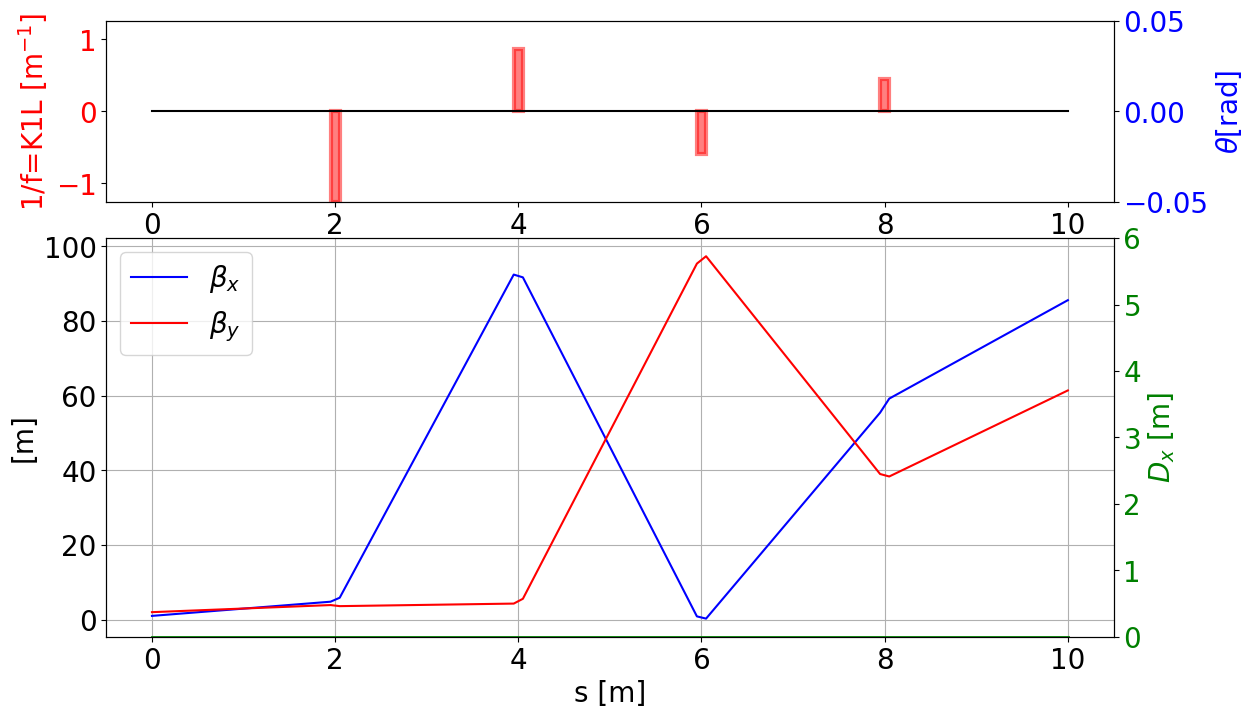

In [27]:
import sys
sys.path.append('../')
import lib_JUAS2024 as lib
lib.plot_layout(myDFTable3)

#### And we can compare this solution with the obtained for the initial configuration

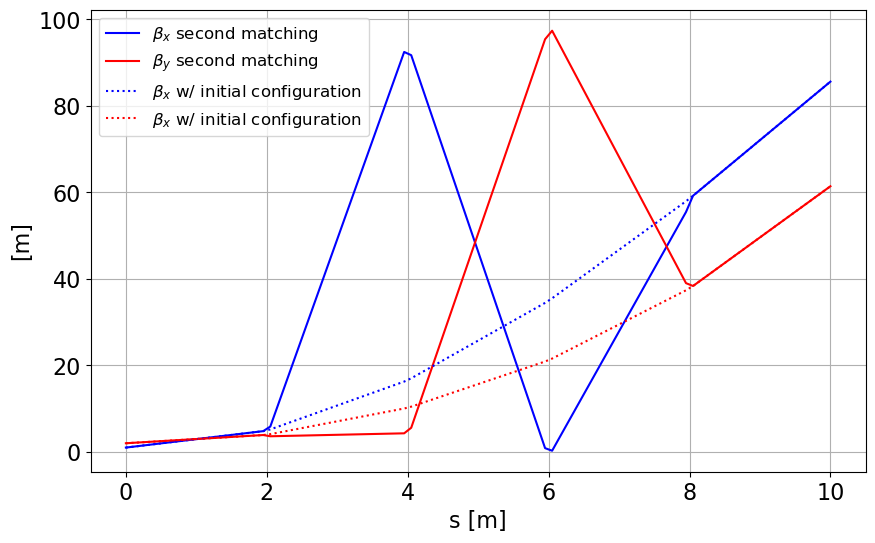

In [28]:
plt.rcParams['figure.dpi'] = 100
fig = plt.figure(figsize=(10,6))

plt.plot(myDFTable3['s'],myDFTable3['betx'],'b', label='$\\beta_x$ second matching')
plt.plot(myDFTable3['s'],myDFTable3['bety'],'r', label='$\\beta_y$ second matching')

plt.plot(myDFTable1['s'],myDFTable1['betx'],':b', label='$\\beta_x$ w/ initial configuration')
plt.plot(myDFTable1['s'],myDFTable1['bety'],':r', label='$\\beta_x$ w/ initial configuration')

plt.legend(loc='best',fontsize=12)
plt.grid()
plt.xlabel('s [m]', fontsize=16)
plt.ylabel('[m]', fontsize=16)
plt.tick_params(axis='y',labelsize=16)
plt.tick_params(axis='x',labelsize=16)

#### **Conclusions**:

#### - It is very important to observe that the second matching DOES not find the initial solution (all gradients equal to 0.1 $m^{-2}$). *The solution is NOT unique*. 

#### Comparison of quadrupoles' strengths (k) obtained:

In [29]:
aux3=myDFTable3[myDFTable3['keyword']=='quadrupole']
aux3['k1l']/aux3['l']

aux1=myDFTable1[myDFTable1['keyword']=='quadrupole']
aux1['k1l']/aux1['l']

comparison=pd.DataFrame({'Second matching k ($m^{-2}$)':aux3['k1l']/aux3['l'],'Initial configuration k ($m^{-2}$)':aux1['k1l']/aux1['l']})
comparison

,Second matching k ($m^{-2}$),Initial configuration k ($m^{-2}$)
q1,-12.576606,0.1
q2,8.640655,0.1
q3,-5.887835,0.1
q4,4.425736,0.1


#### The solution that we found via the matching is very sub-optimal: it requires stronger quadrupoles...

#### 5. Consider that the quadrupoles have an excitation current of a 100 A · $m^{2}$ and an excitation magnetic factor of 2 T/m/A and an aperture of 40 mm diameter. Compute the magnetic field at the poles of the four quadrupoles for the two matching solutions obtained in question 2 and 4 assuming a linear regime and using a dimensional approach

#### The idea of this question is to have an idea of the corresponding magnetic field for the obtained gradients for typical magnets characteristics

#### SECOND MATCHING

In [30]:
# These are the gradients found with the second matching
aux2=myDFTable3[myDFTable3['keyword']=='quadrupole']
aux2=aux2['k1l']/aux2['l']

# Excitation current
aux2=aux2*10 #this is in A*m2

# Excitation magnetic factor
aux2=aux2*2  #this is in T/m/A

#Aperture diameter
aux2=aux2*.04 #this is in T

# Final magnetic field in T
aux2=np.abs(aux2) 

#### INITIAL CONDITION

In [31]:
# These are the gradients that can solve our problem in the second point
aux=myDFTable1[myDFTable1['keyword']=='quadrupole']
aux=aux['k1l']/aux['l']

# Excitation current
aux=aux*10 #this is in A*m2

# Excitation magnetic factor
aux=aux*2  #this is in T/m/A

#Aperture diameter
aux=aux*.04 #this is in T

# Final magnetic field in T
np.abs(aux) 

q1    0.08
q2    0.08
q3    0.08
q4    0.08
dtype: float64

In [32]:
comparison=pd.DataFrame({'Second matching B (T)':aux2,'Initial configuration B (T)':aux})
comparison

,Second matching B (T),Initial configuration B (T)
q1,10.061285,0.08
q2,6.912524,0.08
q3,4.710268,0.08
q4,3.540589,0.08


#### The first magnets are extremely difficult to be built (superconductive). However, in some cases such as the LHC they are the only approach valid. But, for a 2 GeV mahine you may prefer to stay with normal conducting magnets